In [1]:
import data_processing
import torch
import MLP

In [2]:
file_names = ['circle', 'comeHere', 'goAway', 'wave']
label = file_names
data_list_circle = []
data_list_comeHere = []
data_list_goAway = []
data_list_wave = []
data_list = []
image_list = []
label_list = []
data_list = data_processing.read_test_csv(file_names)
# data_list = data_processing.read_csv(file_names)
data_processing.data_preprocessing(data_list)
#data_processing.show_img(file_names, data_list)

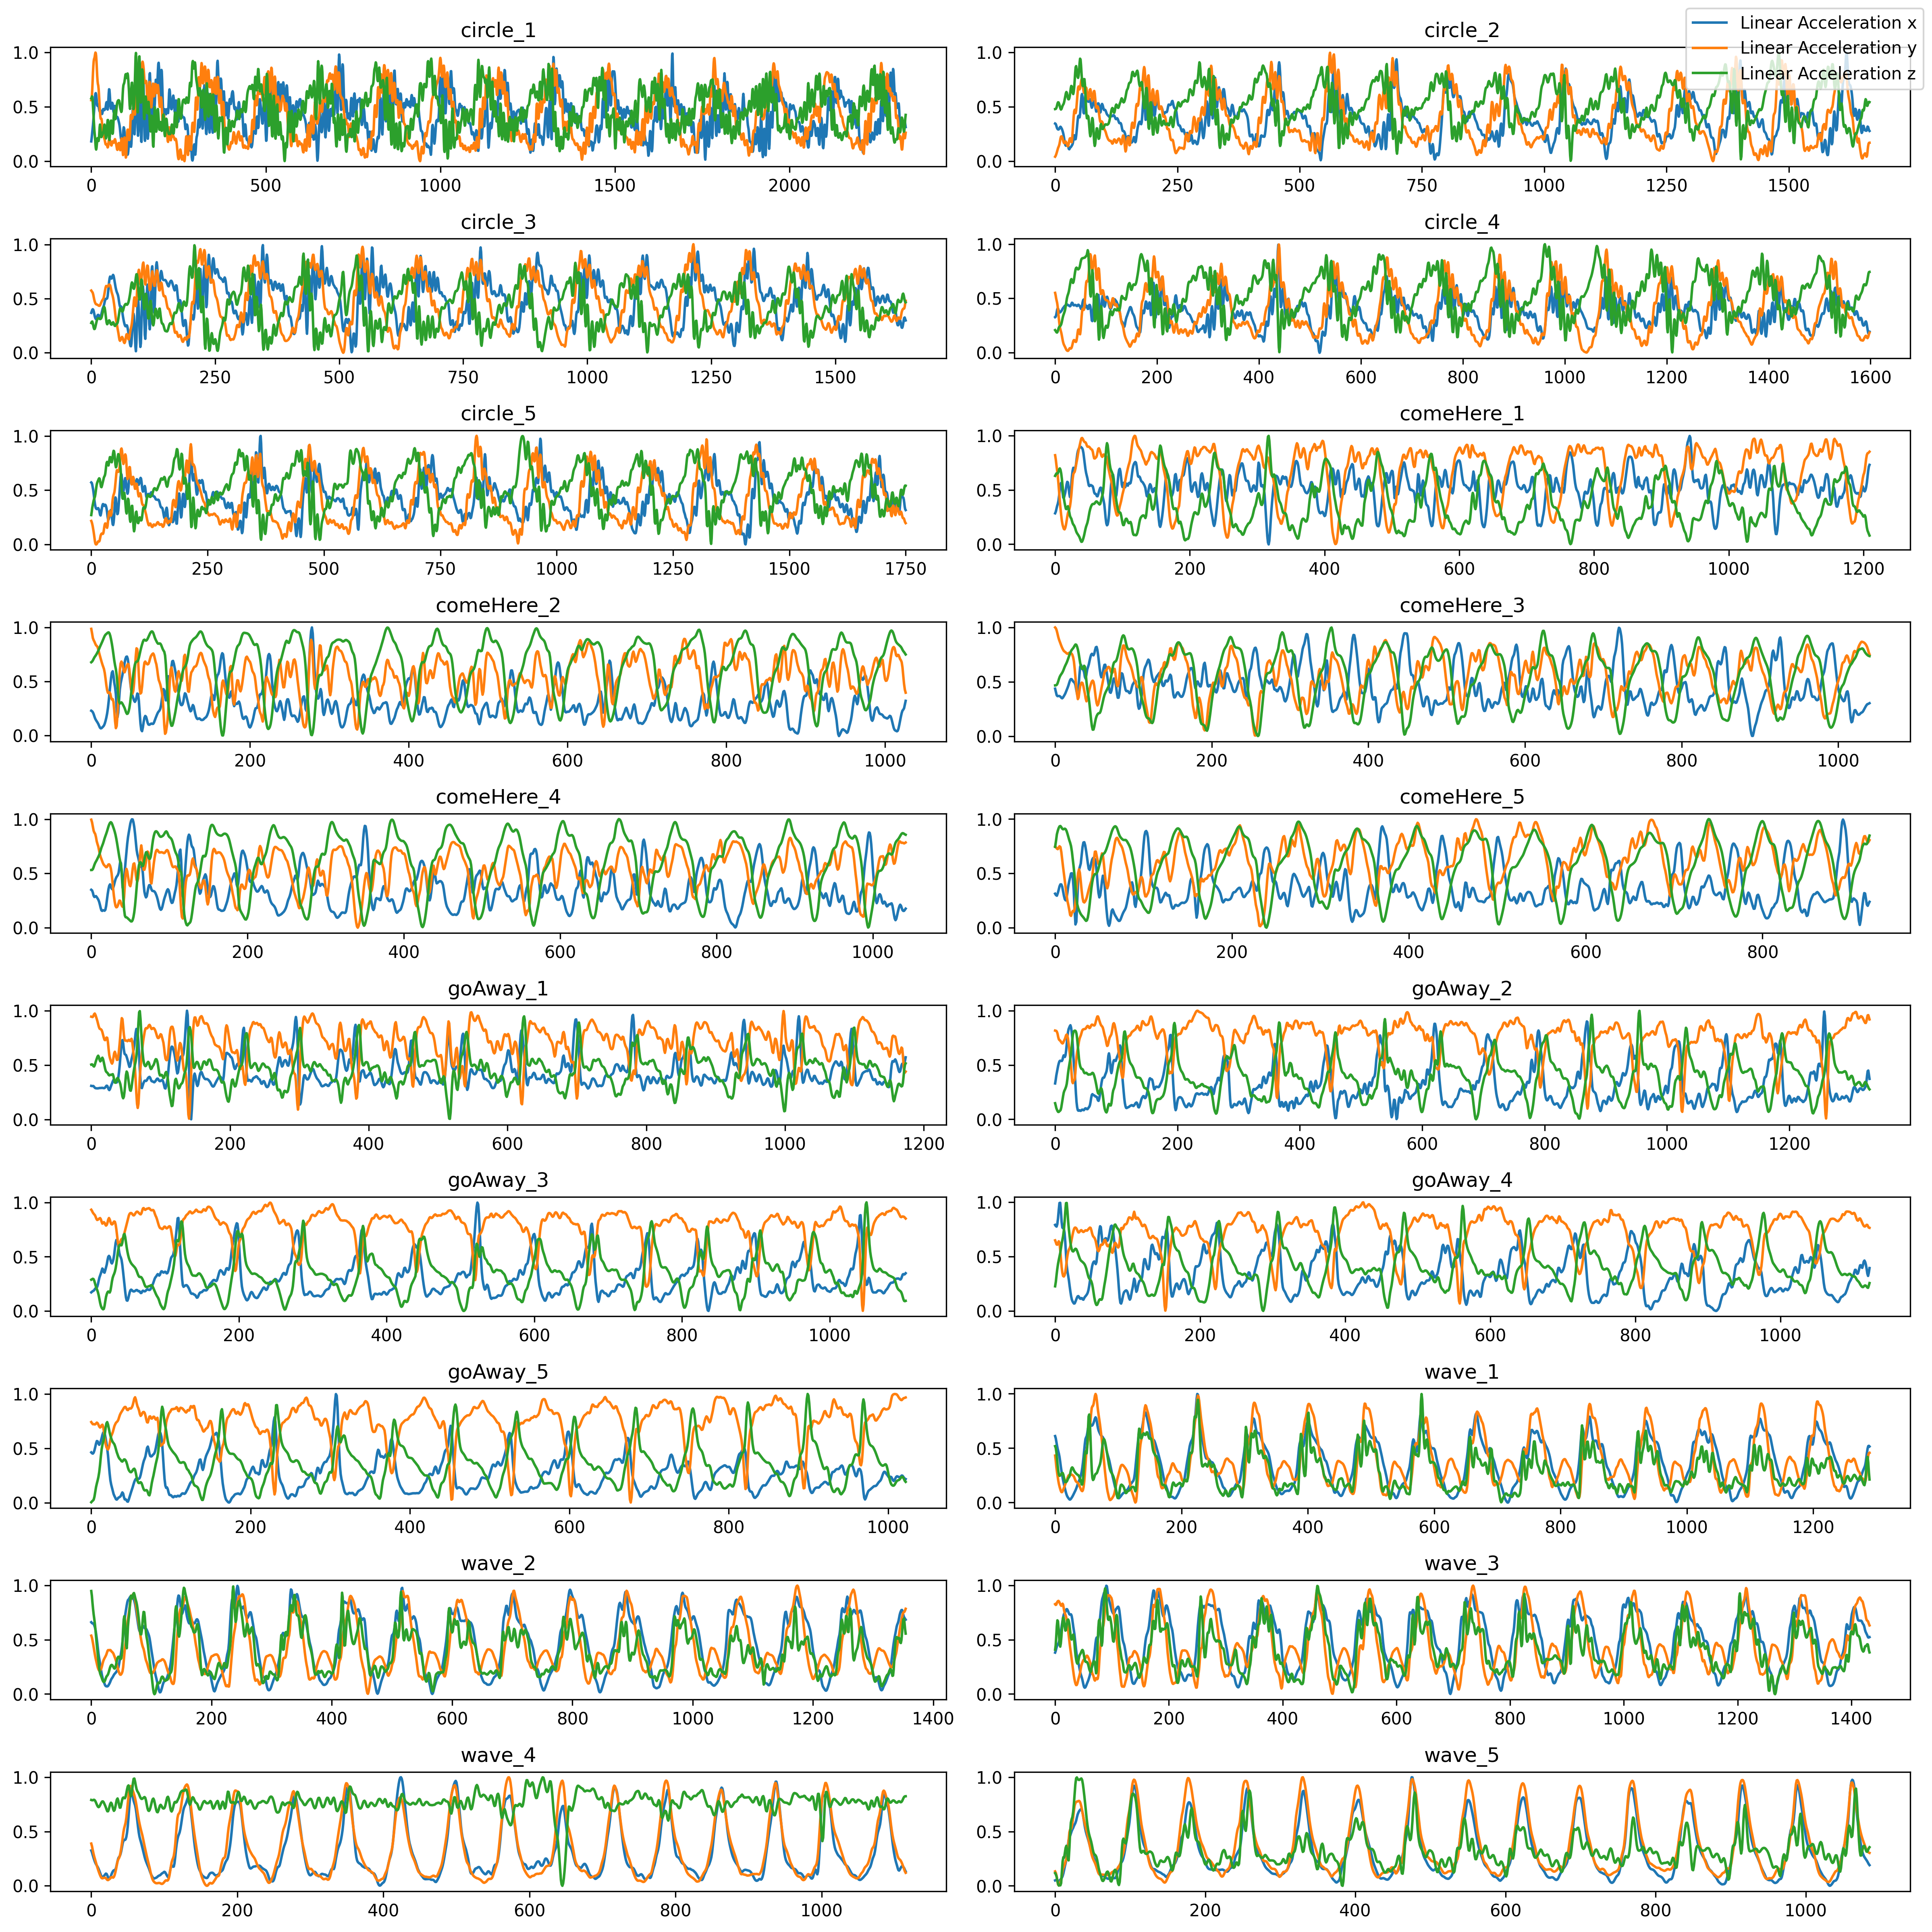

In [3]:
data_list = data_processing.normalization(data_list)
data_list = data_processing.filter_data(data_list)
data_processing.show_img(file_names, data_list)
for i in range(len(data_list)):
    if(data_list[i][1] == 'circle'):
        data_list_circle.append(data_list[i])
    elif(data_list[i][1] == 'comeHere'):
        data_list_comeHere.append(data_list[i])
    elif(data_list[i][1] == 'goAway'):
        data_list_goAway.append(data_list[i])
    elif(data_list[i][1] == 'wave'):
        data_list_wave.append(data_list[i])
# data_processing.show_img(file_names, data_list)
image_list_circle, label_list_circle = data_processing.data_transfer_list(data_list_circle, label)
image_list_comeHere, label_list_comeHere = data_processing.data_transfer_list(data_list_comeHere, label)
image_list_goAway, label_list_goAway = data_processing.data_transfer_list(data_list_goAway, label)
image_list_wave, label_list_wave = data_processing.data_transfer_list(data_list_wave, label)
image_list, label_list = data_processing.data_transfer_list(data_list, label)
label_list_comeHere = [i + 1 for i in label_list_comeHere]
label_list_goAway = [i + 2 for i in label_list_goAway]
label_list_wave = [i + 3 for i in label_list_wave]
X_circle, y_circle = torch.tensor(image_list_circle), torch.tensor(label_list_circle)
X_comeHere, y_comeHere = torch.tensor(image_list_comeHere), torch.tensor(label_list_comeHere)
X_goAway, y_goAway = torch.tensor(image_list_goAway), torch.tensor(label_list_goAway)
X_wave, y_wave = torch.tensor(image_list_wave), torch.tensor(label_list_wave)
X, y = torch.tensor(image_list), torch.tensor(label_list)

In [4]:
net = torch.load('model/net_parameters.pth')

In [5]:
y_hat = net(X)
y_hat_circle = net(X_circle)
y_hat_comeHere = net(X_comeHere)
y_hat_goAway = net(X_goAway)
y_hat_wave = net(X_wave)
accuracy_circle = MLP.accuracy(y_hat_circle, y_circle)/ len(y_hat_circle)
accuracy_comeHere = MLP.accuracy(y_hat_comeHere, y_comeHere)/ len(y_hat_comeHere)
accuracy_goAway = MLP.accuracy(y_hat_goAway, y_goAway)/ len(y_hat_goAway)
accuracy_wave = MLP.accuracy(y_hat_wave, y_wave)/ len(y_hat_wave)
accuracy = MLP.accuracy(y_hat, y)/ len(y_hat)

In [6]:
print("Total accuracy:",accuracy)
print("circle accuracy:",accuracy_circle)
print("comeHere accuracy:",accuracy_comeHere)
print("goAway accuracy:",accuracy_goAway)
print("wave accuracy:",accuracy_wave)

Total accuracy: 0.5262672811059907
circle accuracy: 0.0
comeHere accuracy: 0.48058252427184467
goAway accuracy: 1.0
wave accuracy: 0.94140625


In [8]:
X[0].shape

torch.Size([3, 240])